In [1]:
sc

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
5,application_1589660637587_0006,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-5>

In [2]:
%%configure -f
{ "conf":{
"spark.pyspark.python": "python3",
"spark.pyspark.virtualenv.enabled": "true",
"spark.pyspark.virtualenv.type":"native",
"spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
}}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
6,application_1589660637587_0007,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1589660637587_0005,pyspark,idle,Link,Link,
6,application_1589660637587_0007,pyspark,idle,Link,Link,✔


In [3]:
sc.install_pypi_package("pandas")
sc.install_pypi_package("matplotlib")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

In [4]:
from pyspark.sql import SparkSession

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
#import SparkSession
spark=SparkSession.builder.appName('data_processing').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
#create spark session object
col=spark.read.csv('s3://covid19proyecto3/datasets/colombia/Casos_positivos_de_COVID-19_en_Colombia.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [242]:
global_cases=spark.read.csv('s3://covid19proyecto3/datasets/mundial/time_series_covid19_confirmed_global_narrow.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [243]:
global_recovered= spark.read.csv('s3://covid19proyecto3/datasets/mundial/time_series_covid19_recovered_global_narrow.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [244]:
global_deaths= spark.read.csv('s3://covid19proyecto3/datasets/mundial/time_series_covid19_deaths_global_narrow.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [187]:
#Los 20 paises con mas casos confirmados
global_cases = global_cases.withColumn("Cases",global_cases['Value'].astype('Integer'))
global_cases.groupBy('Country/Region').max('Cases').orderBy('max(Cases)', ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+----------+
|Country/Region|max(Cases)|
+--------------+----------+
|            US|   1442824|
|        Russia|    262843|
|United Kingdom|    236711|
|         Spain|    230183|
|         Italy|    223885|
|        Brazil|    220291|
|        France|    177319|
|       Germany|    175233|
|        Turkey|    146457|
|          Iran|    116635|
|         India|     85784|
|          Peru|     84495|
|         China|     68134|
|       Belgium|     54644|
|  Saudi Arabia|     49176|
|        Mexico|     45032|
|   Netherlands|     43681|
|        Canada|     41429|
|         Chile|     39542|
|      Pakistan|     38799|
+--------------+----------+
only showing top 20 rows

In [188]:
#20 paises con menos casos 
global_cases.groupBy('Country/Region').max('Cases').orderBy('max(Cases)', ascending=True).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+
|      Country/Region|max(Cases)|
+--------------------+----------+
|             Lesotho|         1|
|      Western Sahara|         6|
| Sint Eustatius a...|         6|
|    Papua New Guinea|         8|
|          MS Zaandam|         9|
|            Suriname|        10|
|             Comoros|        11|
|          Seychelles|        11|
|            Holy See|        12|
|             Burundi|        15|
|Saint Kitts and N...|        15|
|            Dominica|        16|
|             Namibia|        16|
|Saint Vincent and...|        17|
|         Saint Lucia|        18|
|              Belize|        18|
|                Fiji|        18|
|                Laos|        19|
|              Bhutan|        21|
|             Grenada|        22|
+--------------------+----------+
only showing top 20 rows

In [189]:
#20 paises con mas muertes
global_deaths = global_deaths.withColumn("Cases",global_deaths['Value'].astype('Integer'))
global_deaths.groupBy('Country/Region').max('Cases').orderBy('max(Cases)', ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+----------+
|Country/Region|max(Cases)|
+--------------+----------+
|            US|     87530|
|United Kingdom|     33998|
|         Italy|     31610|
|        France|     27485|
|         Spain|     27459|
|        Brazil|     14962|
|       Belgium|      8959|
|       Germany|      7897|
|          Iran|      6902|
|   Netherlands|      5643|
|        Mexico|      4767|
|         China|      4512|
|        Turkey|      4055|
|        Sweden|      3646|
|        Canada|      3402|
|         India|      2753|
|       Ecuador|      2594|
|        Russia|      2418|
|          Peru|      2392|
|   Switzerland|      1878|
+--------------+----------+
only showing top 20 rows

In [190]:
#20 paises con menos muertes 
global_deaths.groupBy('Country/Region').max('Cases').orderBy('max(Cases)', ascending=True).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+
|      Country/Region|max(Cases)|
+--------------------+----------+
|             Namibia|         0|
|         Saint Lucia|         0|
|Saint Vincent and...|         0|
|             Grenada|         0|
|              Uganda|         0|
|Saint Kitts and N...|         0|
|            Holy See|         0|
|              Bhutan|         0|
|            Mongolia|         0|
|                Laos|         0|
|         Timor-Leste|         0|
|            Cambodia|         0|
|Central African R...|         0|
|          Madagascar|         0|
|                Fiji|         0|
|              Rwanda|         0|
|            Dominica|         0|
|             Lesotho|         0|
|      Western Sahara|         0|
|             Eritrea|         0|
+--------------------+----------+
only showing top 20 rows

In [191]:
#20 paises con mas recuperados
global_recovered = global_recovered.withColumn("Cases",global_recovered['Value'].astype('Integer'))
global_recovered.groupBy('Country/Region').max('Cases').orderBy('max(Cases)', ascending=False).show()



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+----------+
|Country/Region|max(Cases)|
+--------------+----------+
|            US|    250747|
|       Germany|    151597|
|         Spain|    144783|
|         Italy|    120205|
|        Turkey|    106133|
|          Iran|     91836|
|        Brazil|     84970|
|         China|     64435|
|        France|     59143|
|        Russia|     58226|
|        Canada|     36908|
|        Mexico|     30451|
|         India|     30258|
|          Peru|     27147|
|   Switzerland|     27100|
|  Saudi Arabia|     21869|
|       Ireland|     19470|
|         Chile|     16614|
|       Austria|     14471|
|       Belgium|     14301|
+--------------+----------+
only showing top 20 rows

In [192]:
#20 paises con menos recuperados
global_recovered.groupBy('Country/Region').max('Cases').orderBy('max(Cases)', ascending=True).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+
|      Country/Region|max(Cases)|
+--------------------+----------+
|          Tajikistan|         0|
|             Lesotho|         0|
|          MS Zaandam|         0|
|               Yemen|         1|
|            Holy See|         2|
|             Comoros|         3|
|         South Sudan|         4|
|Sao Tome and Prin...|         4|
|              Bhutan|         5|
| Sint Eustatius a...|         6|
|      Western Sahara|         6|
|          Mauritania|         7|
|             Burundi|         7|
|           Nicaragua|         7|
|    Papua New Guinea|         8|
|            Suriname|         9|
|              Gambia|        10|
|          Seychelles|        10|
|             Namibia|        13|
|Central African R...|        13|
+--------------------+----------+
only showing top 20 rows

In [267]:
from pyspark.sql.functions import udf
#Funcion para extraer el mes
from pyspark.sql.types import StringType,DoubleType,IntegerType
def cases_month(date): 
    date =str(date)
    y,m,d=date.split('-')
    return m

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [268]:
#create udf using python function
month_udf=udf(cases_month,StringType())
#apply udf on dataframe
global_cases=global_cases.withColumn('mes',month_udf(global_cases['Date']))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [245]:
global_cases.groupBy("Region Code").count().show()

#asignación de continente 
def continent(code):
    if code == 142:
        return 'Asia'
    elif code == 150:
        return 'Europa'
    elif code == 2:
        return 'Africa'
    elif code == 19:
        return 'America'
    elif code == 9:
        return 'Oceania'
    else:
       return 'null'



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----+
|Region Code|count|
+-----------+-----+
|       null|  460|
|        142| 9085|
|         19| 7360|
|          9| 1495|
|        150| 5635|
|          2| 6555|
+-----------+-----+

In [248]:
#create udf using python function
continent_udf=udf(continent,StringType())
#apply udf on dataframe
#Agregar columna de continentes en los dataframes
global_cases=global_cases.withColumn('continent',continent_udf(global_cases['Region Code']))
global_deaths=global_deaths.withColumn('continent',continent_udf(global_deaths['Region Code']))
global_recovered=global_recovered.withColumn('continent',continent_udf(global_recovered['Region Code']))


europa=global_cases.filter(global_cases['continent']=='Europa').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
america=global_cases.filter(global_cases['continent']=='America').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
asia=global_cases.filter(global_cases['continent']=='Asia').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
africa=global_cases.filter(global_cases['continent']=='Africa').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
oceania=global_cases.filter(global_cases['continent']=='Oceania').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()

europad=global_deaths.filter(global_deaths['continent']=='Europa').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
americad=global_deaths.filter(global_deaths['continent']=='America').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
asiad=global_deaths.filter(global_deaths['continent']=='Asia').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
africad=global_deaths.filter(global_deaths['continent']=='Africa').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
oceaniad=global_deaths.filter(global_deaths['continent']=='Oceania').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()

europar=global_recovered.filter(global_recovered['continent']=='Europa').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
americar=global_recovered.filter(global_recovered['continent']=='America').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
asiar=global_recovered.filter(global_recovered['continent']=='Asia').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
africar=global_recovered.filter(global_recovered['continent']=='Africa').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
oceaniar=global_recovered.filter(global_recovered['continent']=='Oceania').groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()


#Casos por continente
print('Casos totales por continentes')
print('America:'+str(america[0]['sum(max(Value))']))
print('Europa:'+str(europa[0]['sum(max(Value))']))
print('Asia:'+str(asia[0]['sum(max(Value))']))
print('Africa:'+str(africa[0]['sum(max(Value))']))
print('Oceania:'+str(oceania[0]['sum(max(Value))']))

#Casos recuperados por continente
print('Casos recuperados por continentes')
print('America:'+str(americar[0]['sum(max(Value))']))
print('Europa:'+str(europar[0]['sum(max(Value))']))
print('Asia:'+str(asiar[0]['sum(max(Value))']))
print('Africa:'+str(africar[0]['sum(max(Value))']))
print('Oceania:'+str(oceaniar[0]['sum(max(Value))']))

#Casos fallecidos por continente
print('Casos fallecidos por continentes')
print('America:'+str(americad[0]['sum(max(Value))']))
print('Europa:'+str(europad[0]['sum(max(Value))']))
print('Asia:'+str(asiad[0]['sum(max(Value))']))
print('Africa:'+str(africad[0]['sum(max(Value))']))
print('Oceania:'+str(oceaniad[0]['sum(max(Value))']))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Casos totales por continentes
America:1963551
Europa:1694019
Asia:743628
Africa:79492
Oceania:4658
Casos recuperados por continentes
America:470888
Europa:693949
Asia:417864
Africa:29870
Oceania:4121
Casos fallecidos por continentes
America:118237
Europa:160296
Asia:23871
Africa:2640
Oceania:66

In [197]:
from pyspark.sql import functions as F

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [198]:
#casos totales en el mundo
total_cases=global_cases.groupBy('Country/Region').max('Cases').groupBy().agg(F.sum("max(Cases)")).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [199]:
print(total_cases[0]['sum(max(Cases))']) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

4484373

In [200]:
#total de recuperados en el mundo
total_recovered=global_recovered.groupBy('Country/Region').max('Cases').groupBy().agg(F.sum("max(Cases)")).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [201]:
print(total_recovered[0]['sum(max(Cases))']) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1616363

In [202]:
#muertes totales en el mundo
total_deaths=global_deaths.groupBy('Country/Region').max('Cases').groupBy().agg(F.sum("max(Cases)")).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [203]:
print(total_deaths[0]['sum(max(Cases))']) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

305071

In [300]:
#printSchema
global_cases.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Value: integer (nullable = true)
 |-- ISO 3166-1 Alpha 3-Codes: string (nullable = true)
 |-- Region Code: integer (nullable = true)
 |-- Sub-region Code: integer (nullable = true)
 |-- Intermediate Region Code: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- mes: string (nullable = true)
 |-- Dates: string (nullable = true)

In [269]:
#Mayores casos totales por mes
global_cases.groupBy('mes').max('value').orderBy('mes',ascendent=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+----------+
|mes|max(value)|
+---+----------+
| 01|      5806|
| 02|     66337|
| 03|    188172|
| 04|   1069424|
| 05|   1442824|
+---+----------+

In [272]:
global_deaths=global_deaths.withColumn('mes',month_udf(global_deaths['Date']))
global_recovered=global_recovered.withColumn('mes',month_udf(global_recovered['Date']))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [273]:
#Los mayores casos globales de muertes y recuperaciones por cada mes
global_deaths.groupBy('mes').max('Value').orderBy('mes',ascendent=False).show()
global_recovered.groupBy('mes').max('Value').orderBy('mes',ascendent=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+----------+
|mes|max(Value)|
+---+----------+
| 01|       204|
| 02|      2727|
| 03|     12428|
| 04|     62996|
| 05|     87530|
+---+----------+

+---+----------+
|mes|max(Value)|
+---+----------+
| 01|       141|
| 02|     28993|
| 03|     63153|
| 04|    153947|
| 05|    250747|
+---+----------+

In [208]:
#Mayores casos por fecha
global_cases.groupBy('Date').max('Value').orderBy('Date', ascending=True).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+----------+
|               Date|max(Value)|
+-------------------+----------+
|2020-01-22 00:00:00|       444|
|2020-01-23 00:00:00|       444|
|2020-01-24 00:00:00|       549|
|2020-01-25 00:00:00|       761|
|2020-01-26 00:00:00|      1058|
|2020-01-27 00:00:00|      1423|
|2020-01-28 00:00:00|      3554|
|2020-01-29 00:00:00|      3554|
|2020-01-30 00:00:00|      4903|
|2020-01-31 00:00:00|      5806|
|2020-02-01 00:00:00|      7153|
|2020-02-02 00:00:00|     11177|
|2020-02-03 00:00:00|     13522|
|2020-02-04 00:00:00|     16678|
|2020-02-05 00:00:00|     19665|
|2020-02-06 00:00:00|     22112|
|2020-02-07 00:00:00|     24953|
|2020-02-08 00:00:00|     27100|
|2020-02-09 00:00:00|     29631|
|2020-02-10 00:00:00|     31728|
+-------------------+----------+
only showing top 20 rows

In [209]:
#Libreria matplot y pandas
import matplotlib.pyplot as plt
import pandas as pd


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

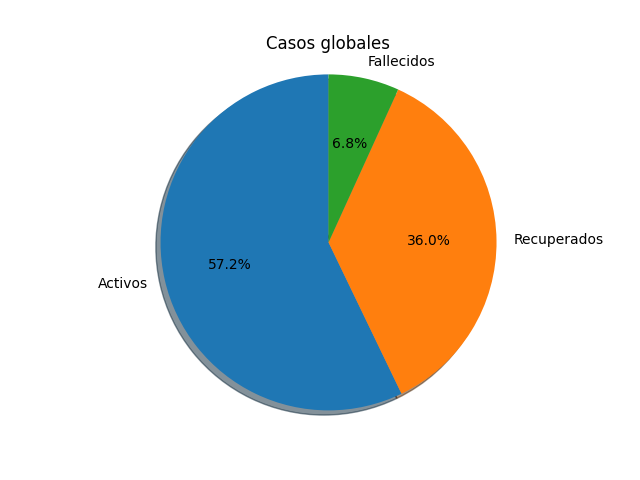

In [210]:
#Casos actuales en el mundo
actives = total_cases[0]['sum(max(Cases))']-(total_recovered[0]['sum(max(Cases))']+total_deaths[0]['sum(max(Cases))'])
recovered =total_recovered[0]['sum(max(Cases))']
death = total_deaths[0]['sum(max(Cases))']
labels= ['Activos','Recuperados', 'Fallecidos']
sizes=[actives,recovered,death]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Casos globales')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

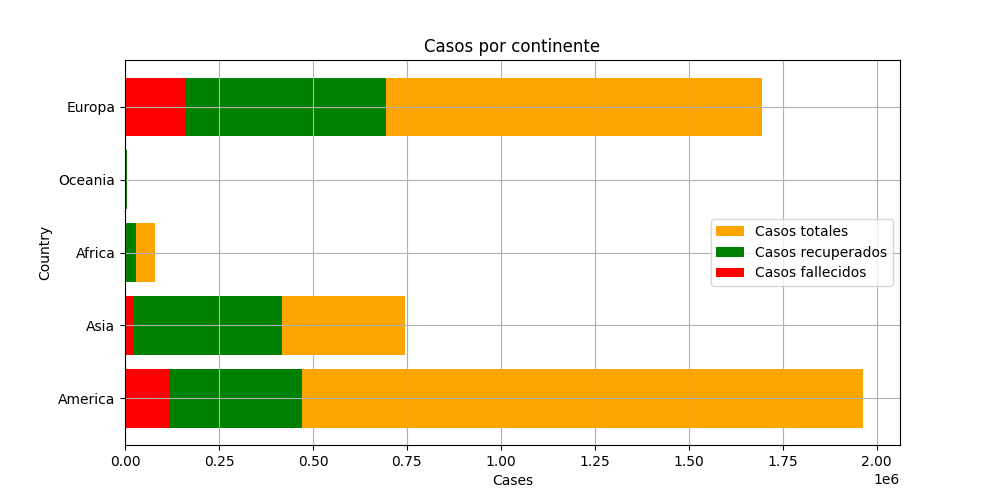

In [241]:
#Casos totales, recuperados y de muertes por cada continente

contc = ['America','Asia','Africa', 'Oceania','Europa']
casosc=[america[0]['sum(max(Value))'],asia[0]['sum(max(Value))'],africa[0]['sum(max(Value))'],oceania[0]['sum(max(Value))'],europa[0]['sum(max(Value))']]

casosr=[americar[0]['sum(max(Value))'],asiar[0]['sum(max(Value))'],africar[0]['sum(max(Value))'],oceaniar[0]['sum(max(Value))'],europar[0]['sum(max(Value))']]

casosd=[americad[0]['sum(max(Value))'],asiad[0]['sum(max(Value))'],africad[0]['sum(max(Value))'],oceaniad[0]['sum(max(Value))'],europad[0]['sum(max(Value))']]

fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(contc, casosc, color='Orange', label ='Casos totales')
ax.barh(contc, casosr, color='Green', label ='Casos recuperados')
ax.barh(contc, casosd, color='Red', label ='Casos fallecidos')
ax.set(xlabel='Cases', ylabel='Country',
       title='Casos por continente')
ax.grid()
ax.legend()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

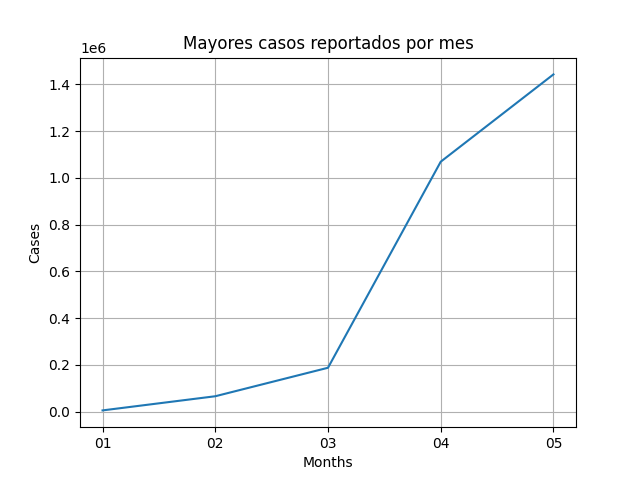

In [277]:
#Mayores casos reportados por mes
meses=  global_cases.groupBy('mes').max('Value').orderBy('mes',ascending=True).toPandas()['mes'].values.tolist()
cantidad= global_cases.groupBy('mes').max('Value').orderBy('mes',ascending=True).toPandas()['max(Value)'].values.tolist()
fig, ax = plt.subplots()
ax.plot(meses, cantidad)
ax.set(xlabel='Months', ylabel='Cases',
       title='Mayores casos reportados por mes')
ax.grid()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

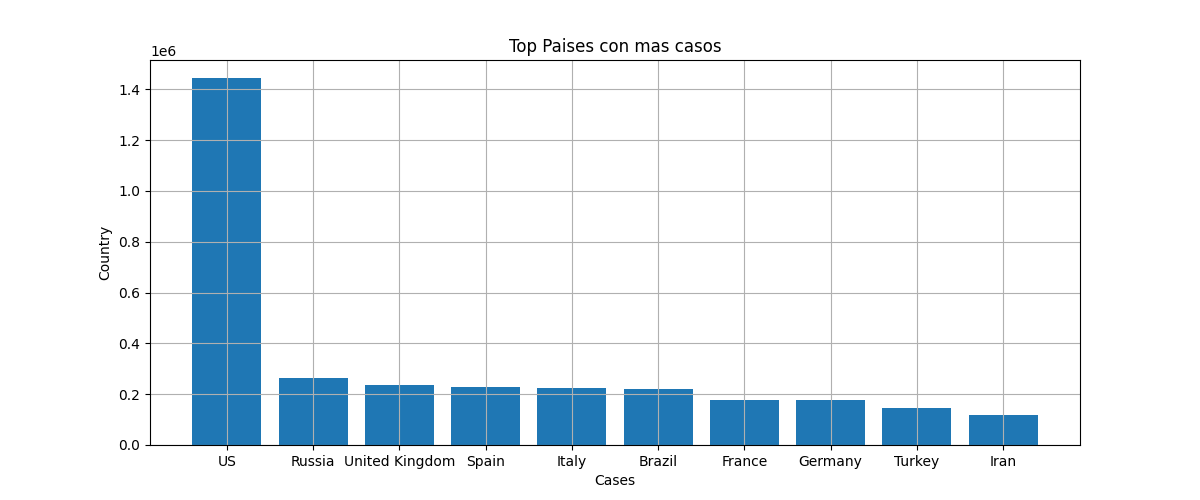

In [288]:
#Los 10 paises con mas casos
paises=  global_cases.groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=False).toPandas()['Country/Region'].values.tolist()
casos=global_cases.groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=False).toPandas()['max(Value)'].values.tolist()
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(paises[0:10], casos[0:10])
ax.set(xlabel='Cases', ylabel='Country',
       title='Top Paises con mas casos')
ax.grid()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

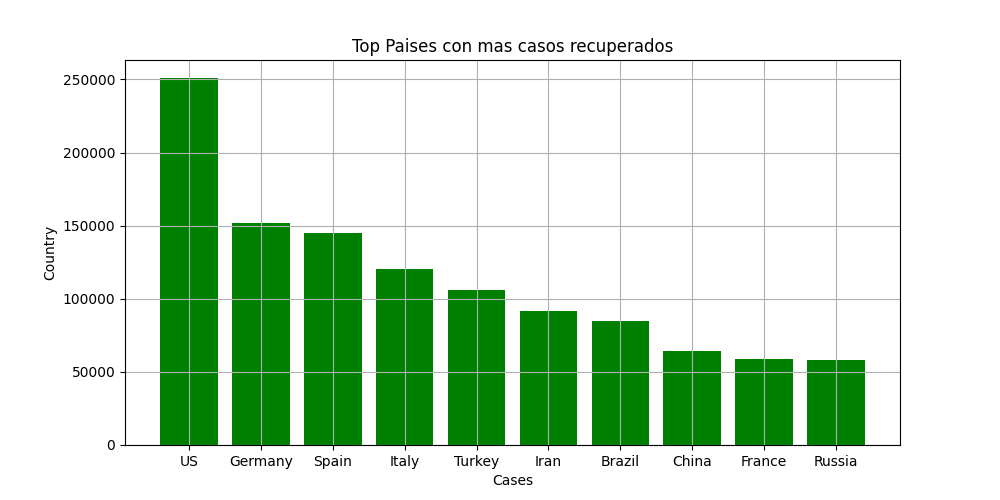

In [290]:
#Los 10 paises con mas recuperados
paises=  global_recovered.groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=False).toPandas()['Country/Region'].values.tolist()
casos=global_recovered.groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=False).toPandas()['max(Value)'].values.tolist()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(paises[0:10], casos[0:10],color='Green')
ax.set(xlabel='Country', ylabel='Cases', 
       title='Top Paises con mas casos recuperados')
ax.grid()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

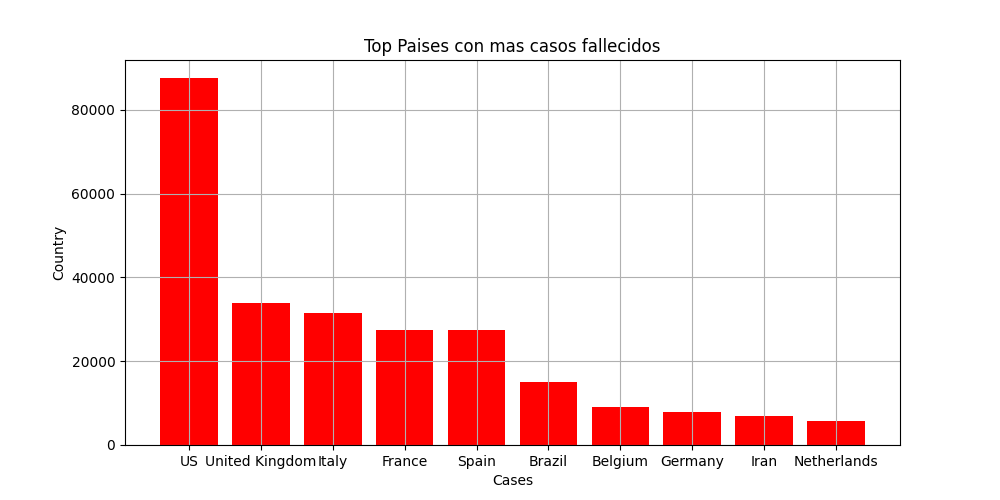

In [293]:
#Los 10 paises con mas fallecidos
paises=  global_deaths.groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=False).toPandas()['Country/Region'].values.tolist()
casos=global_deaths.groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=False).toPandas()['max(Value)'].values.tolist()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(paises[0:10], casos[0:10],color='Red')
ax.set(xlabel='Country', ylabel='Cases', 
       title='Top Paises con mas casos fallecidos')
ax.grid()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

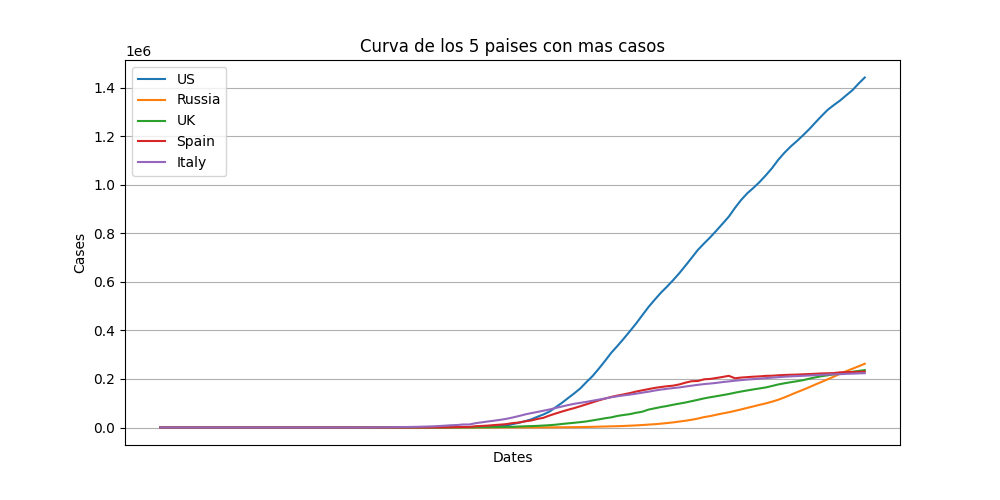

In [337]:
#Historico de los 5 paises mas infectados
#US
global_cases=global_cases.withColumn("Dates",global_cases['Date'].astype('String'))
datessu=  global_cases.filter(global_cases['Country/Region']=='US').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadu= global_cases.filter(global_cases['Country/Region']=='US').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Russia
datessr=  global_cases.filter(global_cases['Country/Region']=='Russia').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadr= global_cases.filter(global_cases['Country/Region']=='Russia').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#United Kingdom
datessuk=  global_cases.filter(global_cases['Country/Region']=='United Kingdom').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidaduk= global_cases.filter(global_cases['Country/Region']=='United Kingdom').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Spain
datessus=  global_cases.filter(global_cases['Country/Region']=='Spain').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadus= global_cases.filter(global_cases['Country/Region']=='Spain').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Italy
datessui=  global_cases.filter(global_cases['Country/Region']=='Italy').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadui= global_cases.filter(global_cases['Country/Region']=='Italy').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()


fig, ax = plt.subplots(figsize=(10,5))
ax.plot(datessu, cantidadu,label='US')
ax.plot(datessr, cantidadr,label='Russia')
ax.plot(datessuk, cantidaduk, label='UK')
ax.plot(datessus, cantidadus, label='Spain')
ax.plot(datessui, cantidadui, label='Italy')

ax.set(xlabel='Dates', ylabel='Cases',
       title='Curva de los 5 paises con mas casos')
ax.grid()
ax.set_xticks(datesu[-1:])
ax.legend()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…